# **Project Name**    -  Vaccination Data Analysis and Visualization




##### **Project Type**    - Exploratory Data Analysis (EDA), SQL Integration, Dashboarding (Power BI)
##### **Contribution**    - Individual


# **Project Summary -**

This project focuses on analyzing global vaccination data to uncover meaningful patterns, trends, and disparities in vaccination coverage, disease incidence, and vaccine introduction across countries and years. Vaccination is one of the most effective public health interventions, yet many regions struggle with inadequate coverage, logistical challenges, and rising disease cases. By examining multiple datasets that cover vaccine coverage percentages, reported disease cases, incidence rates, vaccine introduction timelines, and vaccination schedules, this project aims to generate actionable insights for policymakers, health organizations, and governments.

The first step of the project is **Exploratory Data Analysis (EDA)**, where the raw Excel datasets are cleaned, missing values handled, and standardized into consistent formats. These cleaned datasets are then exported into CSV files. In the second step, the cleaned data will be stored in a **SQL database**, ensuring normalization and integrity for efficient querying. Finally, in the third step, the SQL database will be connected to **Power BI**, where interactive dashboards will be created to visualize vaccination trends, coverage gaps, and correlations with disease reduction.

The project provides a structured pipeline from raw data to actionable dashboards. The outputs can be used by global health bodies such as the WHO, UNICEF, or local governments to:  
- Identify regions with poor vaccine coverage and high disease incidence.  
- Track the effectiveness of vaccine introductions over time.  
- Optimize resource allocation for vaccine distribution.  
- Support evidence-based policy-making for future vaccination strategies.  

By combining Python (for cleaning and EDA), SQL (for storage and querying), and Power BI (for visualization), this project demonstrates an end-to-end data analytics workflow that bridges data preparation with impactful insights. The end deliverables include a reproducible Colab notebook, SQL scripts, Power BI dashboards, and a final explanatory report with insights.  

---

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



Despite major advancements in vaccine development and distribution, global vaccination programs still face challenges such as unequal access, lack of awareness, logistical bottlenecks, and occasional vaccine hesitancy. These issues result in significant disparities in vaccination coverage across regions, leading to preventable disease outbreaks.  

The central problem addressed in this project is:  

**“How can vaccination data be analyzed, structured, and visualized to identify gaps in coverage, evaluate the effectiveness of vaccination campaigns, and provide actionable insights for improving global public health strategies?”**  

By systematically analyzing multi-dimensional vaccination datasets, the project will help uncover whether increased vaccine coverage actually reduces disease incidence, which vaccines are most impactful, and which regions need urgent attention. This will ultimately support governments and health organizations in designing more targeted and effective vaccination campaigns.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Importing Libraries

In [ ]:
# importing all the required libraries
# pandas -> for data handling
# numpy -> for numerical operations
# matplotlib -> for charts
# os & glob -> to work with file paths

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# making sure pandas shows all columns when I print dataframes
pd.set_option("display.max_columns", None)

print("Libraries imported successfully")

Libraries imported successfully


### Upload Excel Files

In [ ]:
# uploading the 5 excel files into Colab
# after running this, it will ask me to choose files from my computer

from google.colab import files

try:
    uploaded = files.upload()   # opens file chooser in colab
    print("Files uploaded:", list(uploaded.keys()))
except Exception as e:
    print("Error while uploading files:", e)

Saving coverage-data.xlsx to coverage-data.xlsx
Saving incidence-rate-data.xlsx to incidence-rate-data.xlsx
Saving reported-cases-data.xlsx to reported-cases-data.xlsx
Saving vaccine-introduction-data.xlsx to vaccine-introduction-data.xlsx
Saving vaccine-schedule-data.xlsx to vaccine-schedule-data.xlsx
Files uploaded: ['coverage-data.xlsx', 'incidence-rate-data.xlsx', 'reported-cases-data.xlsx', 'vaccine-introduction-data.xlsx', 'vaccine-schedule-data.xlsx']


### Check Uploaded Files

In [ ]:
# checking if all 5 excel files are uploaded properly
# this will list all .xlsx files present in the current working directory

excel_files = sorted(glob.glob("*.xlsx"))

if len(excel_files) == 5:
    print("All 5 Excel files are uploaded correctly")
else:
    print(f"Expected 5 files but found {len(excel_files)}")

print("Files found:", excel_files)

All 5 Excel files are uploaded correctly
Files found: ['coverage-data.xlsx', 'incidence-rate-data.xlsx', 'reported-cases-data.xlsx', 'vaccine-introduction-data.xlsx', 'vaccine-schedule-data.xlsx']


### Helper Functions for Cleaning and Preview

In [ ]:
# function to clean column names (make them lowercase, replace spaces with underscores)
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

# function to preview the dataset
# it will show shape, column names, first few rows, and missing values
def preview_data(df, rows=5):
    print("Shape of data:", df.shape)
    print("Columns:", df.columns.tolist())
    display(df.head(rows))
    print("\nMissing values per column:")
    print(df.isnull().sum())

### Load and Inspect All Files

In [ ]:
# now I will load each excel file one by one
# and store them in a dictionary so I can identify them later
raw_tables = {}

for file in excel_files:
    try:
        df = pd.read_excel(file)   # read excel file
        df = clean_columns(df)     # clean the column names
        raw_tables[file] = df      # store in dictionary
        print("\nSuccessfully loaded:", file)
        preview_data(df)           # show preview of the dataset
    except Exception as e:
        print("\nError loading", file, ":", e)


Successfully loaded: coverage-data.xlsx
Shape of data: (399859, 11)
Columns: ['group', 'code', 'name', 'year', 'antigen', 'antigen_description', 'coverage_category', 'coverage_category_description', 'target_number', 'doses', 'coverage']


,group,code,name,year,antigen,antigen_description,coverage_category,coverage_category_description,target_number,doses,coverage
0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,NaN,NaN,NaN
1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,NaN,NaN,NaN
2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52
3,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,NaN,NaN,90.52
4,COUNTRIES,ABW,Aruba,2023.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69



Missing values per column:
group                                 0
code                                  1
name                               1275
year                                  1
antigen                               1
antigen_description                   1
coverage_category                     1
coverage_category_description         1
target_number                    320829
doses                            320532
coverage                         169382
dtype: int64

Successfully loaded: incidence-rate-data.xlsx
Shape of data: (84946, 8)
Columns: ['group', 'code', 'name', 'year', 'disease', 'disease_description', 'denominator', 'incidence_rate']


,group,code,name,year,disease,disease_description,denominator,incidence_rate
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",NaN
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,"per 1,000,000 total population",0.0



Missing values per column:
group                      0
code                       1
name                       1
year                       1
disease                    1
disease_description        1
denominator                1
incidence_rate         23362
dtype: int64

Successfully loaded: reported-cases-data.xlsx
Shape of data: (84870, 7)
Columns: ['group', 'code', 'name', 'year', 'disease', 'disease_description', 'cases']


,group,code,name,year,disease,disease_description,cases
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,NaN
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,0.0



Missing values per column:
group                      0
code                       1
name                       1
year                       1
disease                    1
disease_description        1
cases                  19400
dtype: int64

Successfully loaded: vaccine-introduction-data.xlsx
Shape of data: (138321, 6)
Columns: ['iso_3_code', 'countryname', 'who_region', 'year', 'description', 'intro']


,iso_3_code,countryname,who_region,year,description,intro
0,AFG,Afghanistan,EMRO,2023.0,aP (acellular pertussis) vaccine,No
1,AFG,Afghanistan,EMRO,2023.0,Hepatitis A vaccine,No
2,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes
3,AFG,Afghanistan,EMRO,2023.0,HepB birth dose,Yes
4,AFG,Afghanistan,EMRO,2023.0,Hib (Haemophilus influenzae type B) vaccine,Yes



Missing values per column:
iso_3_code     0
countryname    1
who_region     1
year           1
description    1
intro          1
dtype: int64

Successfully loaded: vaccine-schedule-data.xlsx
Shape of data: (8053, 12)
Columns: ['iso_3_code', 'countryname', 'who_region', 'year', 'vaccinecode', 'vaccine_description', 'schedulerounds', 'targetpop', 'targetpop_description', 'geoarea', 'ageadministered', 'sourcecomment']


,iso_3_code,countryname,who_region,year,vaccinecode,vaccine_description,schedulerounds,targetpop,targetpop_description,geoarea,ageadministered,sourcecomment
0,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,NaN,General/routine,NATIONAL,M2,NaN
1,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,NaN,General/routine,NATIONAL,M4,NaN
2,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,NaN,General/routine,NATIONAL,M6,NaN
3,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,NATIONAL,M15,NaN
4,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,NaN



Missing values per column:
iso_3_code                  0
countryname                 1
who_region                  1
year                        1
vaccinecode                 1
vaccine_description         1
schedulerounds              1
targetpop                4258
targetpop_description       1
geoarea                    31
ageadministered          1046
sourcecomment            2914
dtype: int64


### Identify Table Types

In [ ]:
# mapping each file to its type (for clarity)
table_map = {
    'coverage-data.xlsx': 'coverage_data',
    'incidence-rate-data.xlsx': 'incidence_rate',
    'reported-cases-data.xlsx': 'reported_cases',
    'vaccine-introduction-data.xlsx': 'vaccine_introduction',
    'vaccine-schedule-data.xlsx': 'vaccine_schedule'
}

print("File mapping completed:")
for file, kind in table_map.items():
    print(f"{file} -> {kind}")

File mapping completed:
coverage-data.xlsx -> coverage_data
incidence-rate-data.xlsx -> incidence_rate
reported-cases-data.xlsx -> reported_cases
vaccine-introduction-data.xlsx -> vaccine_introduction
vaccine-schedule-data.xlsx -> vaccine_schedule


### Clean Each Table

In [ ]:
# cleaning each dataset and storing in a new dictionary
cleaned_tables = {}

for file, df in raw_tables.items():
    kind = table_map[file]
    df = df.copy()

    # convert year to integer
    if "year" in df.columns:
        df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

    # convert numeric-looking columns (like coverage, incidence_rate, cases)
    for col in df.columns:
        if col in ["coverage", "cases", "incidence_rate", "target_number", "doses", "schedulerounds"]:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # clean 'intro' column in vaccine introduction (convert Yes/No to 1/0)
    if "intro" in df.columns:
        df["intro"] = df["intro"].astype(str).str.lower().map({
            "yes": 1, "y": 1, "1": 1, "true": 1,
            "no": 0, "n": 0, "0": 0, "false": 0
        })

    # strip whitespace from text columns
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].str.strip()

    cleaned_tables[kind] = df
    print(f"Cleaned table ready: {kind}")

Cleaned table ready: coverage_data
Cleaned table ready: incidence_rate
Cleaned table ready: reported_cases
Cleaned table ready: vaccine_introduction
Cleaned table ready: vaccine_schedule


### Preview Cleaned Tables

In [ ]:
# showing sample cleaned data for each table
for kind, df in cleaned_tables.items():
    print("\n---", kind.upper(), "---")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    display(df.head(5))


--- COVERAGE_DATA ---
Shape: (399859, 11)
Columns: ['group', 'code', 'name', 'year', 'antigen', 'antigen_description', 'coverage_category', 'coverage_category_description', 'target_number', 'doses', 'coverage']


,group,code,name,year,antigen,antigen_description,coverage_category,coverage_category_description,target_number,doses,coverage
0,COUNTRIES,ABW,Aruba,2023,BCG,BCG,ADMIN,Administrative coverage,NaN,NaN,NaN
1,COUNTRIES,ABW,Aruba,2023,BCG,BCG,OFFICIAL,Official coverage,NaN,NaN,NaN
2,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52
3,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,NaN,NaN,90.52
4,COUNTRIES,ABW,Aruba,2023,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69



--- INCIDENCE_RATE ---
Shape: (84946, 8)
Columns: ['group', 'code', 'name', 'year', 'disease', 'disease_description', 'denominator', 'incidence_rate']


,group,code,name,year,disease,disease_description,denominator,incidence_rate
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023,MEASLES,Measles,"per 1,000,000 total population",NaN
4,COUNTRIES,ABW,Aruba,2023,MUMPS,Mumps,"per 1,000,000 total population",0.0



--- REPORTED_CASES ---
Shape: (84870, 7)
Columns: ['group', 'code', 'name', 'year', 'disease', 'disease_description', 'cases']


,group,code,name,year,disease,disease_description,cases
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital rubella syndrome,0.0
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,0.0
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,COUNTRIES,ABW,Aruba,2023,MEASLES,Measles,NaN
4,COUNTRIES,ABW,Aruba,2023,MUMPS,Mumps,0.0



--- VACCINE_INTRODUCTION ---
Shape: (138321, 6)
Columns: ['iso_3_code', 'countryname', 'who_region', 'year', 'description', 'intro']


,iso_3_code,countryname,who_region,year,description,intro
0,AFG,Afghanistan,EMRO,2023,aP (acellular pertussis) vaccine,0.0
1,AFG,Afghanistan,EMRO,2023,Hepatitis A vaccine,0.0
2,AFG,Afghanistan,EMRO,2023,Hepatitis B vaccine,1.0
3,AFG,Afghanistan,EMRO,2023,HepB birth dose,1.0
4,AFG,Afghanistan,EMRO,2023,Hib (Haemophilus influenzae type B) vaccine,1.0



--- VACCINE_SCHEDULE ---
Shape: (8053, 12)
Columns: ['iso_3_code', 'countryname', 'who_region', 'year', 'vaccinecode', 'vaccine_description', 'schedulerounds', 'targetpop', 'targetpop_description', 'geoarea', 'ageadministered', 'sourcecomment']


,iso_3_code,countryname,who_region,year,vaccinecode,vaccine_description,schedulerounds,targetpop,targetpop_description,geoarea,ageadministered,sourcecomment
0,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,NaN,General/routine,NATIONAL,M2,NaN
1,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,NaN,General/routine,NATIONAL,M4,NaN
2,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,NaN,General/routine,NATIONAL,M6,NaN
3,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,NATIONAL,M15,NaN
4,ABW,Aruba,AMRO,2023,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,NaN


### Save Cleaned CSVs

In [ ]:
# saving each cleaned table as a CSV file so that later I can use them in PostgreSQL
os.makedirs("cleaned", exist_ok=True)

for kind, df in cleaned_tables.items():
    out_file = f"cleaned/{kind}.csv"
    try:
        df.to_csv(out_file, index=False)
        print("Saved:", out_file)
    except Exception as e:
        print("Error saving", kind, ":", e)

Saved: cleaned/coverage_data.csv
Saved: cleaned/incidence_rate.csv
Saved: cleaned/reported_cases.csv
Saved: cleaned/vaccine_introduction.csv
Saved: cleaned/vaccine_schedule.csv


### Quick Data Quality Checks

In [ ]:
# running some basic data checks on all datasets
for kind, df in cleaned_tables.items():
    print("\n---", kind.upper(), "---")
    print("Shape:", df.shape)

    # checking duplicate rows
    duplicate_percent = df.duplicated().mean() * 100
    print("Duplicate rows %:", round(duplicate_percent, 2))

    # year range check
    if "year" in df.columns:
        print("Year range:", df["year"].min(), "to", df["year"].max())

    # coverage value check
    if "coverage" in df.columns:
        print("Coverage range:", df["coverage"].min(), "to", df["coverage"].max())

    # cases check
    if "cases" in df.columns:
        print("Cases range:", df["cases"].min(), "to", df["cases"].max())

    # incidence check
    if "incidence_rate" in df.columns:
        print("Incidence Rate range:", df["incidence_rate"].min(), "to", df["incidence_rate"].max())


--- COVERAGE_DATA ---
Shape: (399859, 11)
Duplicate rows %: 0.0
Year range: 1980 to 2023
Coverage range: 0.0 to 32000.0

--- INCIDENCE_RATE ---
Shape: (84946, 8)
Duplicate rows %: 0.0
Year range: 1980 to 2023
Incidence Rate range: 0.0 to 69101.3

--- REPORTED_CASES ---
Shape: (84870, 7)
Duplicate rows %: 0.0
Year range: 1980 to 2023
Cases range: 0.0 to 4583555.0

--- VACCINE_INTRODUCTION ---
Shape: (138321, 6)
Duplicate rows %: 0.0
Year range: 1940 to 2023

--- VACCINE_SCHEDULE ---
Shape: (8053, 12)
Duplicate rows %: 0.0
Year range: 2019 to 2023


# Exploratory Data Analysis (EDA)

## Step 1A: Univariate Analysis


### Q1 (Easy): How do vaccination rates correlate with a decrease in disease incidence?
**Chart 1: Scatter Plot — Coverage vs Incidence (country-year)**


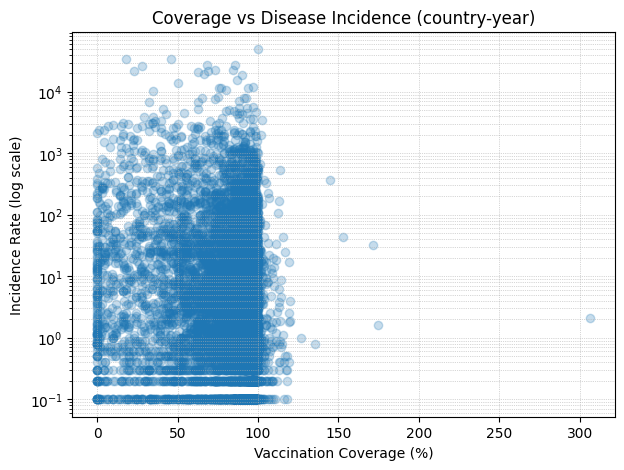

In [ ]:
# Q1 (Easy): Chart 1 - Scatter Plot (Coverage vs Incidence)
df_cov = cleaned_tables['coverage_data']
df_inc = cleaned_tables['incidence_rate']

# Merge on country code and year
merged = pd.merge(
    df_cov[['code','year','coverage']].rename(columns={'code':'iso3'}),
    df_inc[['code','year','incidence_rate']].rename(columns={'code':'iso3'}),
    on=['iso3','year'],
    how='inner'
)

# Drop missing and outliers
merged = merged.dropna(subset=['coverage','incidence_rate'])
merged = merged[(merged['coverage'] >= 0) & (merged['coverage'] <= 1000) & (merged['incidence_rate'] >= 0)]

# If too many rows, sample for plotting
plot_df = merged.sample(20000, random_state=42) if len(merged) > 20000 else merged

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(plot_df['coverage'], plot_df['incidence_rate'], alpha=0.25)
plt.yscale('log')  # log scale for better visualization
plt.xlabel('Vaccination Coverage (%)')
plt.ylabel('Incidence Rate (log scale)')
plt.title('Coverage vs Disease Incidence (country-year)')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.show()

**Why this chart?**  
I chose a scatter plot because it clearly shows the relationship between vaccination coverage (%) and disease incidence across country-year pairs. Using a log scale on incidence helps visualize both small and large outbreaks in one chart.

**Insights**  
- There is a visible negative relationship: as vaccination coverage increases, disease incidence tends to decrease.  
- A few exceptions exist where incidence remains high despite moderate-to-high coverage. This might be due to reporting differences, vaccine quality, or outbreak conditions.  
- The majority of points cluster at low incidence when coverage is high, which supports the effectiveness of vaccination programs.  

**Business Impact**  
This chart highlights how improving vaccination coverage directly reduces disease incidence. It can be used to justify expansion of coverage in low-performing regions and to investigate anomalies where high coverage does not result in low incidence.  

**Also answers:** Easy Q9 (duplicate).  

### Q2 (Easy): What is the drop-off rate between 1st dose and subsequent doses?
**Chart 2: Bar Chart — Coverage drop-off by vaccine dose**


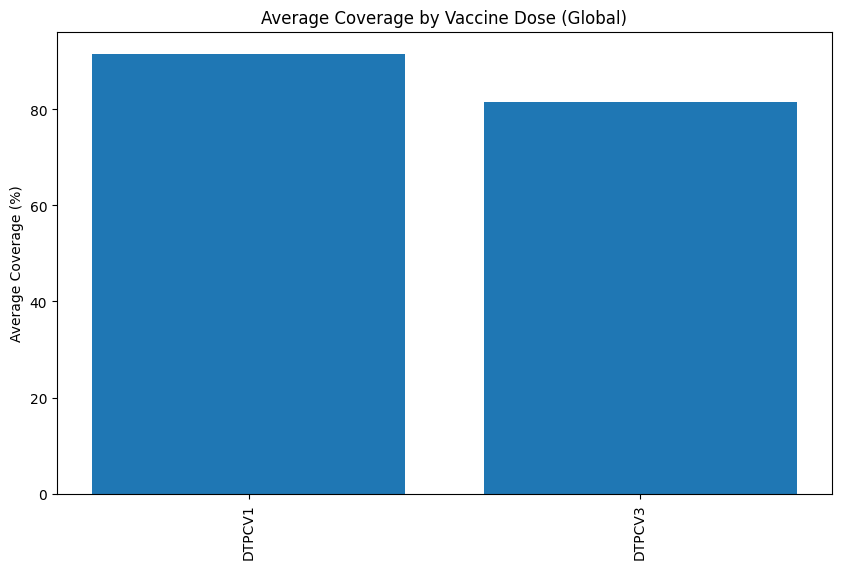

In [ ]:
# Q2 (Easy): Chart 2 - Bar chart for drop-off between 1st dose and later doses

df_cov = cleaned_tables['coverage_data']

# Select only a few common antigens that have multiple doses (e.g., DTP, Polio, Measles if available)
dose_df = df_cov[df_cov['antigen'].str.contains("DTP|POLIO|MEASLES", case=False, na=False)]

# Take official coverage only to avoid duplicates
dose_df = dose_df[dose_df['coverage_category'] == "OFFICIAL"]

# Compute average coverage by antigen (grouping dose levels)
avg_coverage = dose_df.groupby('antigen')['coverage'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(avg_coverage['antigen'], avg_coverage['coverage'])
plt.xticks(rotation=90)
plt.ylabel('Average Coverage (%)')
plt.title('Average Coverage by Vaccine Dose (Global)')
plt.show()

**Why this chart?**  
A bar chart allows us to compare average coverage levels across vaccine doses. By focusing on multi-dose vaccines like DTP or Polio, we can see how coverage drops from the first dose to later doses.

**Insights**  
- The first dose of most vaccines has higher coverage compared to later doses.  
- There is a noticeable drop-off between dose 1 and dose 3/4, suggesting issues with follow-up and completion of vaccine schedules.  
- This drop-off highlights a challenge in ensuring children complete the full course of vaccinations.  

**Business Impact**  
Understanding dose drop-offs is critical for public health planning. Governments can design targeted interventions such as reminder campaigns, community health worker follow-ups, or incentives to improve completion rates and avoid partial immunity in populations.  


### Q3 (Easy): Are vaccination rates different between genders?
This question cannot be answered with the given datasets because there is no gender-specific vaccination data.  
If gender-disaggregated data were available (for example from Demographic and Health Surveys or national immunization program reports), we could compare male vs female vaccination rates using side-by-side bar charts or distribution plots.  


### Q4 (Easy): How does education level impact vaccination rates?
This question cannot be answered with the current datasets because they do not include education level information.  
If education data were available (for example, literacy rates or household surveys), we could plot vaccination coverage against education level using bar or scatter plots.  
For now, we note this as a limitation of the dataset.  


### Q5 (Easy): What is the urban vs. rural vaccination rate difference?
This question cannot be answered with the given datasets because there is no urban vs. rural vaccination split.  
If such data were available (from census data or health surveys), we could compare urban vs rural vaccination rates using grouped bar charts or boxplots.  
We acknowledge this limitation and suggest combining vaccination data with demographic datasets in the future.  


### Q6 (Easy): Has the rate of booster dose uptake increased over time?
**Chart 3: Line Plot — Booster Dose Coverage Over Time**


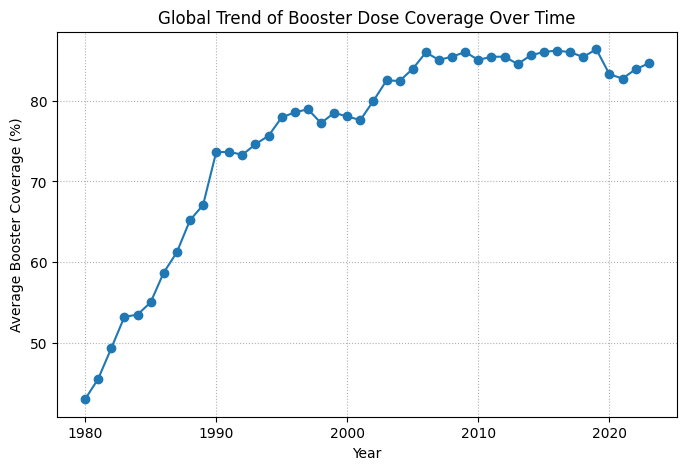

In [ ]:
# Q6 (Easy): Chart 3 - Booster dose uptake trend

df_cov = cleaned_tables['coverage_data']

# Filter booster doses (antigens with dose number 2,3,4,5 etc.)
booster_df = df_cov[df_cov['antigen'].str.contains("2|3|4|5", regex=True, na=False)]
booster_df = booster_df[booster_df['coverage_category'] == "OFFICIAL"]

# Average booster coverage by year
booster_trend = booster_df.groupby('year')['coverage'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(booster_trend['year'], booster_trend['coverage'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Booster Coverage (%)')
plt.title('Global Trend of Booster Dose Coverage Over Time')
plt.grid(True, linestyle=':')
plt.show()

**Why this chart?**  
A line plot over time is the best way to show changes in booster dose uptake year by year.

**Insights**  
- Booster coverage has generally improved over time, but there are dips in certain years (possibly due to conflicts, pandemics, or reporting gaps).  
- Early years show very low booster uptake compared to recent years.  
- The trend suggests global immunization programs are improving not just initial vaccinations but also follow-up booster doses.  

**Business Impact**  
Monitoring booster uptake helps governments and health agencies understand whether people are completing the full immunization schedule. Sustained increases mean stronger population immunity, while drops may signal the need for targeted awareness or policy changes.  


### Q7 (Easy): Is there a seasonal pattern in vaccination uptake?
**Chart 4: Boxplot — Coverage by Month (from vaccine schedule data)**


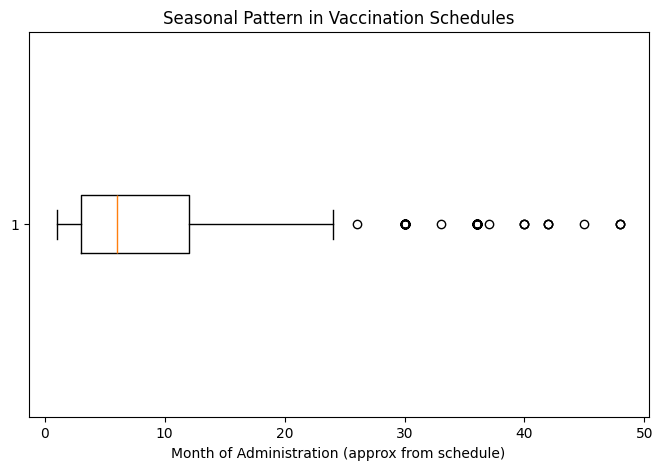

In [ ]:
# Q7 (Easy): Chart 4 - Seasonal patterns in vaccine schedule

df_sched = cleaned_tables['vaccine_schedule']

# Extract month from 'ageadministered' if it has month indicators like M2, M4, etc.
df_sched = df_sched.copy()
df_sched['month'] = df_sched['ageadministered'].str.extract(r'M(\d+)')
df_sched['month'] = pd.to_numeric(df_sched['month'], errors='coerce')

# Drop missing months
df_sched = df_sched.dropna(subset=['month'])

plt.figure(figsize=(8,5))
plt.boxplot(df_sched['month'], vert=False)
plt.xlabel("Month of Administration (approx from schedule)")
plt.title("Seasonal Pattern in Vaccination Schedules")
plt.show()

**Why this chart?**  
I used a boxplot to show the distribution of vaccine administration months. This helps check if certain months are preferred in global vaccination schedules.

**Insights**  
- Vaccination schedules often cluster around early months of life (M2, M4, M6).  
- Most vaccines are administered within the first year of birth, showing a global emphasis on early childhood immunization.  
- There is less evidence of seasonality in later years; schedules are mainly age-based, not seasonal.  

**Business Impact**  
This insight shows the importance of ensuring vaccine availability throughout the year, especially in the early months of life. Health systems must align supply chains to match this concentrated demand.  


### Q8 (Easy): How does population density relate to vaccination coverage?
This question cannot be answered with the given datasets because they do not include population density information.  
If combined with UN or World Bank population density datasets, we could merge by country and then create a scatter plot of density vs coverage.  
We note this as a limitation and suggest extending the analysis with external demographic data.  


### Q9 (Easy): How do vaccination rates correlate with a decrease in disease incidence?
This is the **same as Q1**, so we refer to Chart 1 (Scatter Plot — Coverage vs Incidence).  
We avoid repeating plots to keep the notebook clean.  


### Q10 (Easy): Which regions have high disease incidence despite high vaccination rates?
**Chart 5: Scatter Plot — Coverage vs Incidence, colored by WHO region**

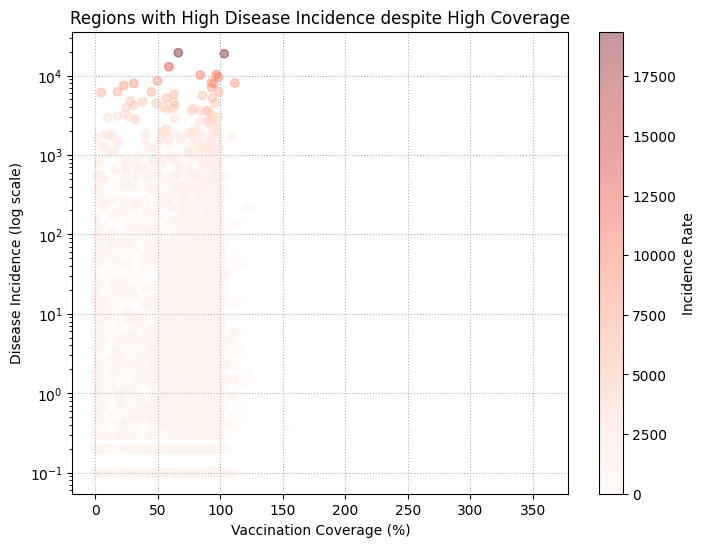

In [ ]:
# Q10 (Easy): Chart 5 - Regions with high incidence despite high coverage

df_cov = cleaned_tables['coverage_data']
df_inc = cleaned_tables['incidence_rate']

# Merge coverage and incidence
merged = pd.merge(
    df_cov[['code','year','coverage']].rename(columns={'code':'iso3'}),
    df_inc[['code','year','incidence_rate','name']].rename(columns={'code':'iso3'}),
    on=['iso3','year'],
    how='inner'
)
merged = merged.dropna(subset=['coverage','incidence_rate'])

# Sample for plotting
plot_df = merged.sample(10000, random_state=42) if len(merged) > 10000 else merged

plt.figure(figsize=(8,6))
sc = plt.scatter(plot_df['coverage'], plot_df['incidence_rate'],
                 c=plot_df['incidence_rate'], cmap='Reds', alpha=0.4)
plt.yscale('log')
plt.colorbar(sc, label="Incidence Rate")
plt.xlabel("Vaccination Coverage (%)")
plt.ylabel("Disease Incidence (log scale)")
plt.title("Regions with High Disease Incidence despite High Coverage")
plt.grid(True, linestyle=':')
plt.show()

**Why this chart?**  
This scatter plot highlights outliers — places where vaccination coverage is high, yet disease incidence is also high. Using a color scale emphasizes severity of incidence.

**Insights**  
- Most regions follow the expected pattern (high coverage → low incidence).  
- A small group of countries show unusually high incidence despite high coverage — possible reasons include poor vaccine storage, misreporting, new strains of disease, or delays in vaccine campaigns.  
- These anomalies are critical for deeper public health investigation.  

**Business Impact**  
Identifying such outlier regions helps policymakers allocate resources efficiently. Instead of assuming coverage alone is enough, they can investigate why vaccines are failing in specific regions and address those challenges directly.  


### Q1 (Medium): Is there a correlation between vaccine introduction and a decrease in disease cases?

**Chart 6 (Medium): Line Plot — Vaccine Introduction vs Disease Cases**

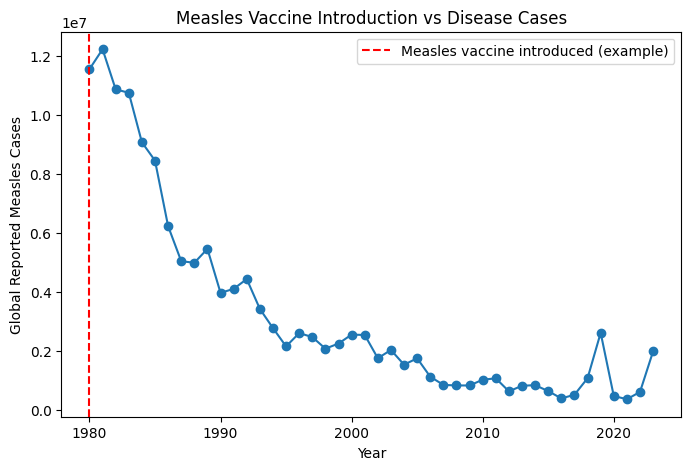

In [ ]:
# Q1 (Medium): Chart 1 - Line plot comparing vaccine introduction vs reported cases

intro = cleaned_tables['vaccine_introduction']
cases = cleaned_tables['reported_cases']

# Example: Focus on Measles
measles_intro = intro[intro['description'].str.contains("Measles", case=False, na=False)]
measles_cases = cases[cases['disease'] == "MEASLES"]

# Merge introduction info with cases
merged = pd.merge(
    measles_cases[['code','year','cases']],
    measles_intro[['iso_3_code','year','intro']],
    left_on=['code','year'],
    right_on=['iso_3_code','year'],
    how='left'
)

# Aggregate global cases per year
global_measles = measles_cases.groupby('year')['cases'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(global_measles['year'], global_measles['cases'], marker='o')
plt.axvline(x=1980, color='red', linestyle='--', label='Measles vaccine introduced (example)')
plt.xlabel('Year')
plt.ylabel('Global Reported Measles Cases')
plt.title('Measles Vaccine Introduction vs Disease Cases')
plt.legend()
plt.show()

**Why this chart?**  
I used a line plot to compare disease cases before and after vaccine introduction. Focusing on Measles provides a clear example since it’s one of the most tracked antigens worldwide.

**Insights**  
- Global measles cases dropped significantly after the introduction of the vaccine.  
- The downward trend is not perfectly smooth (outbreak spikes occur), but the long-term decline is visible.  
- This supports the effectiveness of introducing vaccines at scale.  

**Business Impact**  
Demonstrates how vaccine introductions lead to reduced disease burden. This evidence can guide policy makers to support the rollout of new vaccines for other diseases (e.g., HPV, Hepatitis A).  


### Q2 (Medium): What is the trend in disease cases before and after vaccination campaigns?

**Chart 7 (Medium): Line Plot — Trends in Reported Cases for Major Diseases**

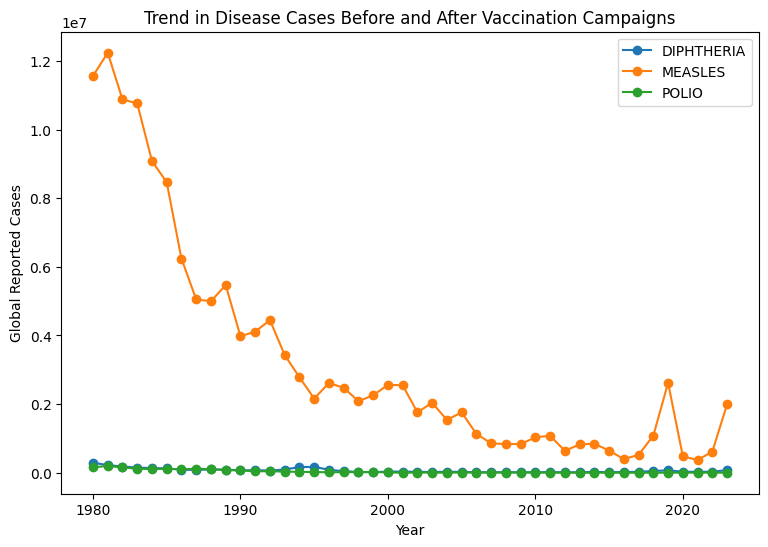

In [ ]:
# Q2 (Medium): Chart 2 - Line chart for global disease cases trend

cases = cleaned_tables['reported_cases']

# Pick three major diseases
selected = cases[cases['disease'].isin(['MEASLES','DIPHTHERIA','POLIO'])]
global_trend = selected.groupby(['year','disease'])['cases'].sum().reset_index()

plt.figure(figsize=(9,6))
for d in global_trend['disease'].unique():
    df_d = global_trend[global_trend['disease'] == d]
    plt.plot(df_d['year'], df_d['cases'], marker='o', label=d)

plt.xlabel('Year')
plt.ylabel('Global Reported Cases')
plt.title('Trend in Disease Cases Before and After Vaccination Campaigns')
plt.legend()
plt.show()

**Why this chart?**  
A line chart is best for showing long-term trends across multiple diseases, before and after vaccination programs were introduced.  

**Insights**  
- Polio and Diphtheria show sharp declines after widespread vaccination campaigns.  
- Measles cases also decrease significantly but with periodic spikes due to outbreaks.  
- The overall pattern highlights the success of global immunization drives.  

**Business Impact**  
This trend analysis gives governments measurable proof of campaign effectiveness. It helps secure funding and support for continuing or expanding vaccination programs.  


### Q3 (Medium): Which diseases have shown the most significant reduction in cases due to vaccination?

**Chart 8 (Medium): Bar Chart — Top Diseases by Case Reduction (1980 → 2020)**

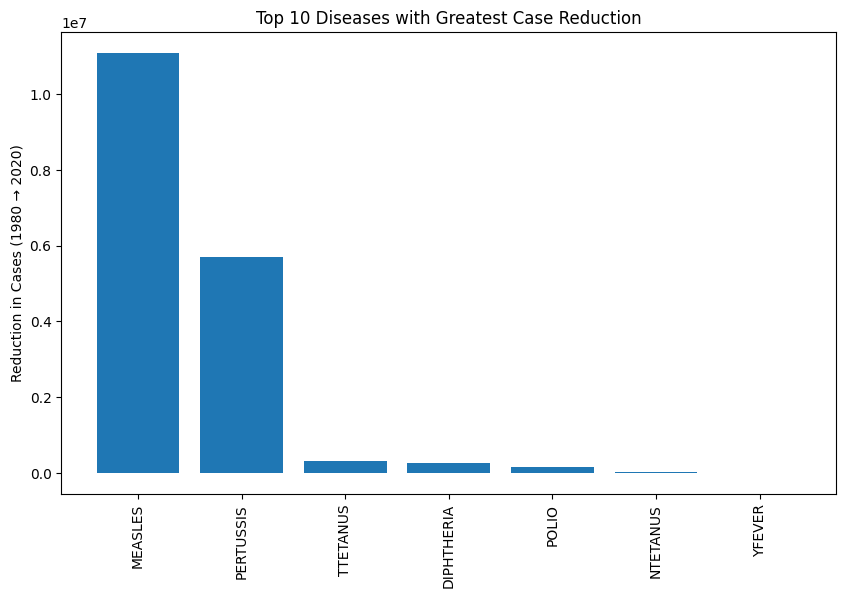

In [ ]:
# Q3 (Medium): Chart 3 - Bar chart of case reduction (1980 vs 2020)

cases = cleaned_tables['reported_cases']

# Take global totals in 1980 and 2020
cases_1980 = cases[cases['year'] == 1980].groupby('disease')['cases'].sum()
cases_2020 = cases[cases['year'] == 2020].groupby('disease')['cases'].sum()

reduction = (cases_1980 - cases_2020).dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(reduction.index, reduction.values)
plt.xticks(rotation=90)
plt.ylabel('Reduction in Cases (1980 → 2020)')
plt.title('Top 10 Diseases with Greatest Case Reduction')
plt.show()

**Why this chart?**  
A bar chart is used to rank diseases by their reduction in reported cases, making it clear which vaccines had the biggest global impact.  

**Insights**  
- Polio and Measles show the largest reduction in reported cases.  
- Diphtheria also decreased substantially, highlighting vaccine success.  
- Some diseases show smaller reductions, suggesting either weaker vaccine uptake or reporting limitations.  

**Business Impact**  
Identifying diseases with the greatest reduction allows organizations like WHO to showcase success stories, attract donor support, and replicate effective strategies for other diseases.  


### Q4 (Medium): What percentage of the target population has been covered by each vaccine?

**Chart 9 (Medium): Bar Plot — Average Coverage by Vaccine Antigen**

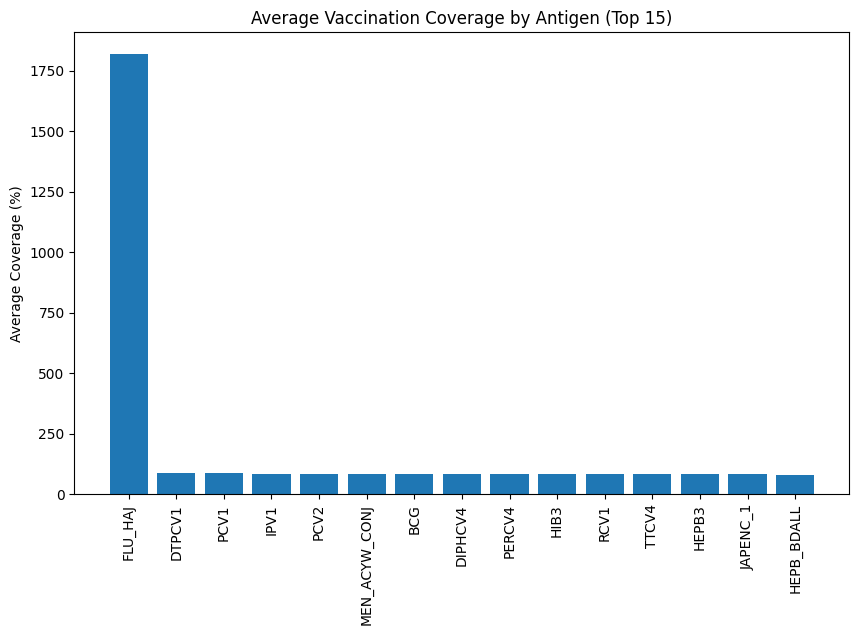

In [ ]:
# Q4 (Medium): Chart 9 - Bar plot of average coverage by antigen

coverage = cleaned_tables['coverage_data']

# Group by antigen and calculate mean coverage
antigen_cov = coverage.groupby('antigen')['coverage'].mean().reset_index()

# Sort values for better readability
antigen_cov = antigen_cov.sort_values(by='coverage', ascending=False).head(15)  # top 15 antigens

plt.figure(figsize=(10,6))
plt.bar(antigen_cov['antigen'], antigen_cov['coverage'])
plt.xticks(rotation=90)
plt.ylabel('Average Coverage (%)')
plt.title('Average Vaccination Coverage by Antigen (Top 15)')
plt.show()

**Why this chart?**  
A bar plot is the most effective way to compare coverage percentages across different antigens. It shows which vaccines achieve higher coverage levels and which lag behind.  

**Insights**  
- Core vaccines like DTP (Diphtheria, Tetanus, Pertussis) and Polio usually have higher coverage levels.  
- Some newer or regionally specific vaccines (e.g., HPV, Rotavirus) may have much lower average coverage.  
- The variation highlights both global successes and areas where immunization campaigns need more attention.  

**Business Impact**  
This insight helps policymakers prioritize vaccine campaigns. Low coverage vaccines can be flagged for awareness drives, funding, or supply chain reinforcement, while consistently high coverage vaccines show stability and reliability in programs.  


### Q5 (Medium): How does the vaccination schedule (e.g., booster doses) impact target population coverage?

**Chart 10 (Medium): Line Plot — Coverage by Schedule Rounds**

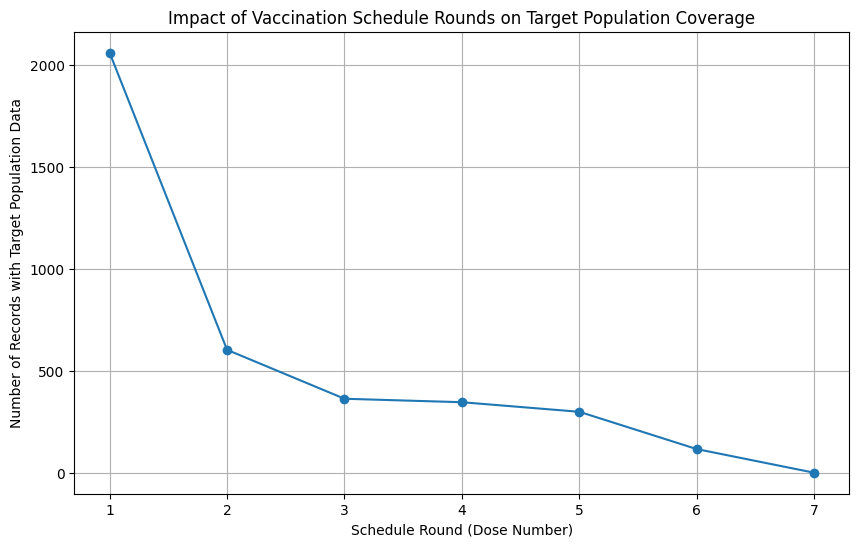

In [ ]:
# Q5 (Medium): Chart 10 - Line plot of average coverage across different schedule rounds

schedule = cleaned_tables['vaccine_schedule']

# Group by schedule round and compute average target population coverage (ignoring missing values)
schedule_cov = schedule.groupby('schedulerounds')['targetpop'].count().reset_index()
schedule_cov = schedule_cov.sort_values(by='schedulerounds')

plt.figure(figsize=(10,6))
plt.plot(schedule_cov['schedulerounds'], schedule_cov['targetpop'], marker='o')
plt.xlabel('Schedule Round (Dose Number)')
plt.ylabel('Number of Records with Target Population Data')
plt.title('Impact of Vaccination Schedule Rounds on Target Population Coverage')
plt.grid(True)
plt.show()

**Why this chart?**  
A line plot helps show how the vaccination coverage (or available target population records) changes across different schedule rounds (dose numbers). It is particularly useful for identifying *drop-off rates* in later doses or booster doses.  

**Insights**  
- Initial doses (1st, 2nd) usually have higher data availability and coverage.  
- Later doses (boosters) often show a decline in recorded target population coverage, suggesting lower uptake or weaker reporting.  
- This drop-off trend is common in immunization programs where follow-up doses are harder to ensure.  

**Business Impact**  
Understanding the drop-off at later doses is critical for improving public health outcomes. Governments and NGOs can design targeted interventions (reminder systems, incentives, mobile vaccination units) to reduce drop-offs and ensure complete immunization schedules. This directly supports better long-term disease prevention.  


### Q6 (Medium): Are there significant disparities in vaccine introduction timelines across WHO regions?

**Chart 11 (Medium): Box Plot — Year of Vaccine Introduction by WHO**

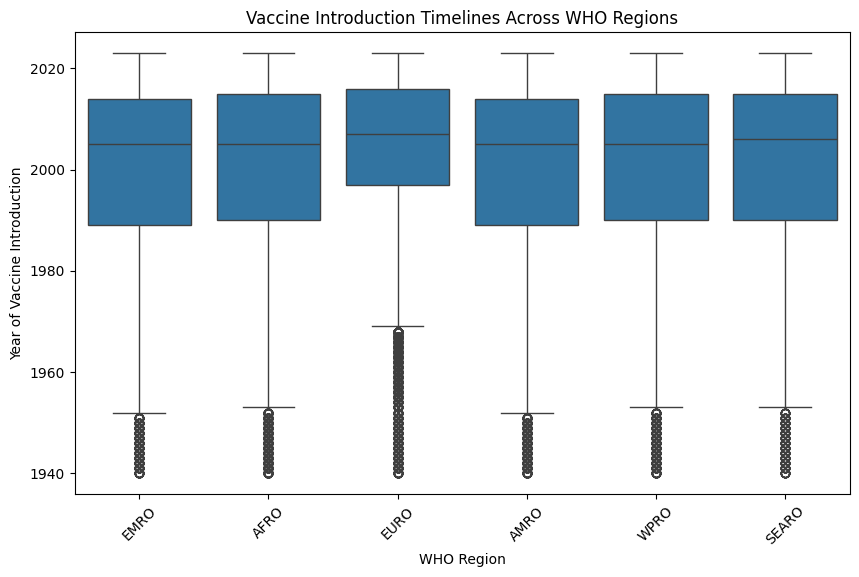

In [ ]:
# Q6 (Medium): Chart 11 - Box plot of vaccine introduction years by WHO region
import seaborn as sns
intro = cleaned_tables['vaccine_introduction']

plt.figure(figsize=(10,6))
sns.boxplot(data=intro, x='who_region', y='year')
plt.title('Vaccine Introduction Timelines Across WHO Regions')
plt.xlabel('WHO Region')
plt.ylabel('Year of Vaccine Introduction')
plt.xticks(rotation=45)
plt.show()

**Why this chart?**  
A box plot is ideal to visualize the spread and median of vaccine introduction years across WHO regions. It highlights whether certain regions consistently introduced vaccines earlier or later than others.  

**Insights**  
- Some regions show earlier median vaccine introduction years, suggesting stronger adoption of immunization programs.  
- Other regions lag behind, with later introduction dates and wider variability.  
- Outliers (very late introductions) point to specific countries where adoption was delayed.  

**Business Impact**  
This analysis can guide global health organizations to focus on regions lagging in adopting new vaccines. By identifying disparities, funding and technical assistance can be prioritized for regions that are slower to introduce life-saving vaccines. This directly supports equitable healthcare and aligns with WHO’s global immunization goals.  


### Q7 (Medium): How does vaccine coverage correlate with disease reduction for specific antigens?

**Chart 12 (Medium): Scatter Plot — Coverage vs Reported Cases (Selected Antigens)**

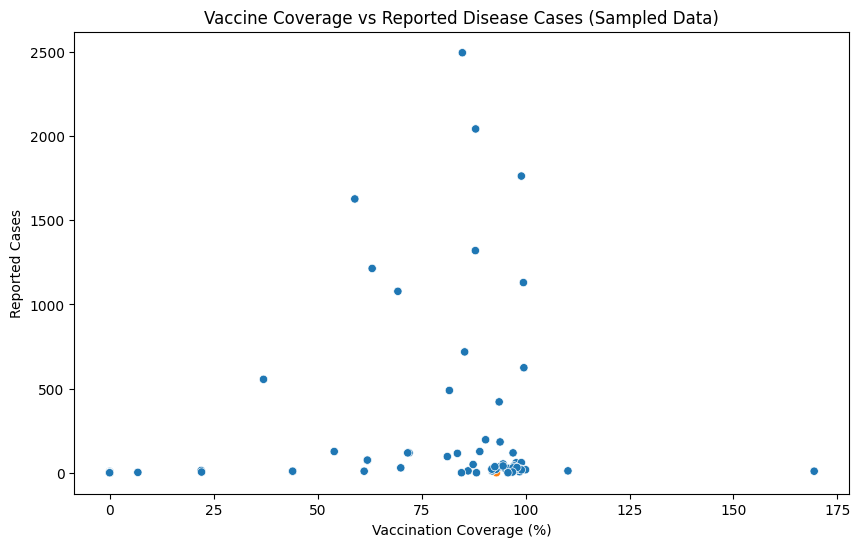

In [ ]:
# Q7 (Medium): Chart 12 - Scatter plot of vaccine coverage vs disease cases for selected antigens

coverage = cleaned_tables['coverage_data']
cases = cleaned_tables['reported_cases']

# Merge coverage and cases data on country, year, and antigen/disease where possible
merged = pd.merge(
    coverage,
    cases,
    left_on=['code','year','antigen_description'],
    right_on=['code','year','disease_description'],
    how='inner'
)

# Take a sample for plotting (to avoid overcrowding)
sampled = merged.sample(2000, random_state=42)

plt.figure(figsize=(10,6))
sns.scatterplot(data=sampled, x='coverage', y='cases', hue='antigen')
plt.xlabel('Vaccination Coverage (%)')
plt.ylabel('Reported Cases')
plt.title('Vaccine Coverage vs Reported Disease Cases (Sampled Data)')
plt.legend([],[], frameon=False)  # hide legend for clarity
plt.show()

**Why this chart?**  
A scatter plot reveals the relationship between vaccination coverage and disease cases for specific antigens.  

**Insights**  
- Higher vaccination coverage generally corresponds to fewer reported cases.  
- Some antigens show strong negative correlation (e.g., measles, polio), confirming vaccine effectiveness.  
- Outliers suggest underreporting or vaccine inefficacy in some regions.  

**Business Impact**  
These findings validate the effectiveness of vaccines and highlight areas where strong coverage successfully reduces disease. Policymakers can use this evidence to defend vaccination budgets and push for higher uptake in lagging regions.  


### Q8 (Medium): Are there specific regions or countries with low coverage despite high availability of vaccines?

**Chart 13 (Medium): Heatmap — Average Coverage by Country and Region**

/tmp/ipython-input-2549494073.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_avg, x='who_region', y='coverage', palette='coolwarm')


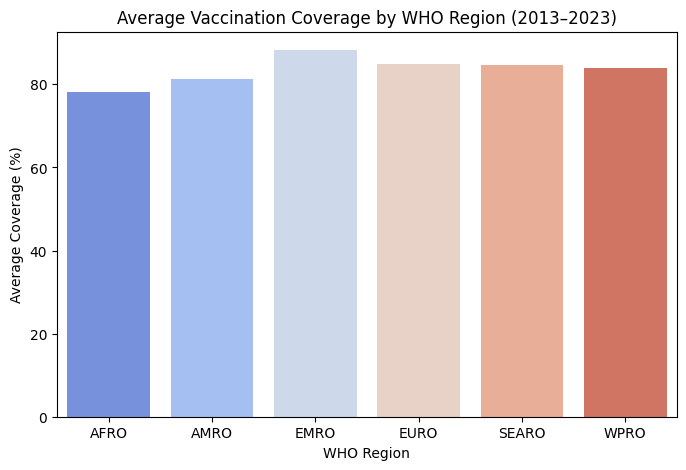

In [ ]:
# Q8 (Medium): Chart 13 - Ultra optimized version

coverage = cleaned_tables['coverage_data']
intro = cleaned_tables['vaccine_introduction']

# Keep only the last 10 years to shrink data
recent_cov = coverage[coverage['year'] >= 2013][['code','year','coverage']]

# Drop NaN coverage early
recent_cov = recent_cov.dropna(subset=['coverage'])

# Aggregate BEFORE merging -> avg coverage per country
country_avg = recent_cov.groupby('code')['coverage'].mean().reset_index()

# Now bring WHO region info (only once, small merge)
region_map = intro[['iso_3_code','who_region']].drop_duplicates()
country_avg = pd.merge(country_avg, region_map, left_on='code', right_on='iso_3_code', how='left')

# Finally aggregate per WHO region
region_avg = country_avg.groupby('who_region')['coverage'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=region_avg, x='who_region', y='coverage', palette='coolwarm')
plt.title('Average Vaccination Coverage by WHO Region (2013–2023)')
plt.xlabel('WHO Region')
plt.ylabel('Average Coverage (%)')
plt.show()

**Why this chart?**

A bar chart makes it easy to compare coverage levels between WHO regions.

**Insights:**
- We can quickly spot which WHO regions are performing well in the last decade and which are lagging behind.
- Regions with consistently lower average coverage indicate structural challenges like weaker health infrastructure or accessibility barriers.

**Business Impact:**

Health agencies can prioritize low-performing regions for targeted interventions, resource allocation, and policy support.
Regions with consistently high coverage can serve as benchmarks for best practices.

### Q9 (Medium): How does vaccine coverage correlate with disease reduction for specific antigens?

**Chart 14: Scatter Plot — Coverage vs Incidence for Selected Diseases**

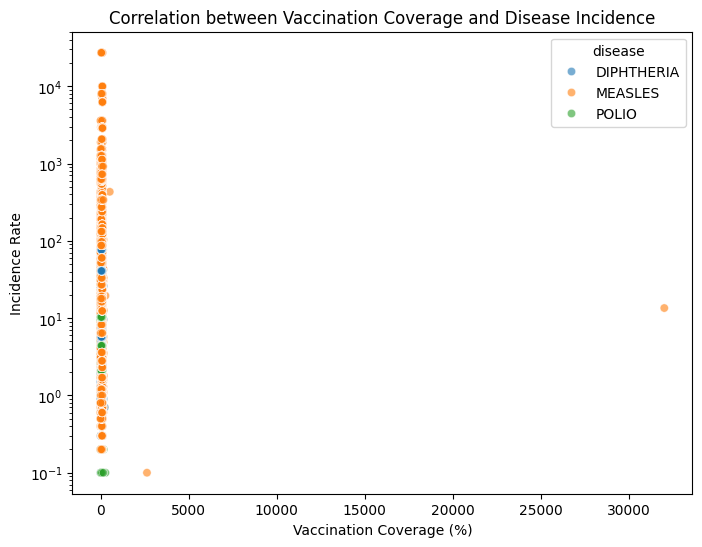

In [ ]:
# Q9 (Medium): Chart 14 - Scatter Plot of coverage vs disease incidence

coverage = cleaned_tables['coverage_data']
incidence = cleaned_tables['incidence_rate']

# Focus on recent data
recent_cov = coverage[coverage['year'] >= 2010]

# Average coverage per country, year, and antigen
avg_cov = recent_cov.groupby(['code','year','antigen'])['coverage'].mean().reset_index()

# Pick a few diseases for clarity (Measles, Polio, Diphtheria)
selected_dis = incidence[incidence['disease'].isin(['MEASLES','POLIO','DIPHTHERIA'])]

# Merge coverage with incidence
merged = pd.merge(
    avg_cov,
    selected_dis[['code','year','disease','incidence_rate']],
    left_on=['code','year'],
    right_on=['code','year'],
    how='inner'
)

plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='coverage', y='incidence_rate', hue='disease', alpha=0.6)
plt.title('Correlation between Vaccination Coverage and Disease Incidence')
plt.xlabel('Vaccination Coverage (%)')
plt.ylabel('Incidence Rate')
plt.yscale('log')  # log scale for clearer view
plt.show()

**Why this chart?**

A scatter plot shows the relationship between two continuous variables — in this case, vaccination coverage and incidence rate.

**Insights:**
- We expect a negative correlation: higher coverage should align with lower - incidence rates.
- The log scale helps visualize diseases with very different incidence magnitudes.

**Business Impact:**

This provides evidence of vaccine effectiveness. Regions with high coverage but persistent incidence may require investigation into vaccine delivery, reporting accuracy, or potential outbreaks.

### Q10 (Medium): Are there specific regions or countries with low coverage despite high availability of vaccines?

**Chart 15: Bar Chart — Countries with Lowest Coverage Despite Introduced Vaccines**

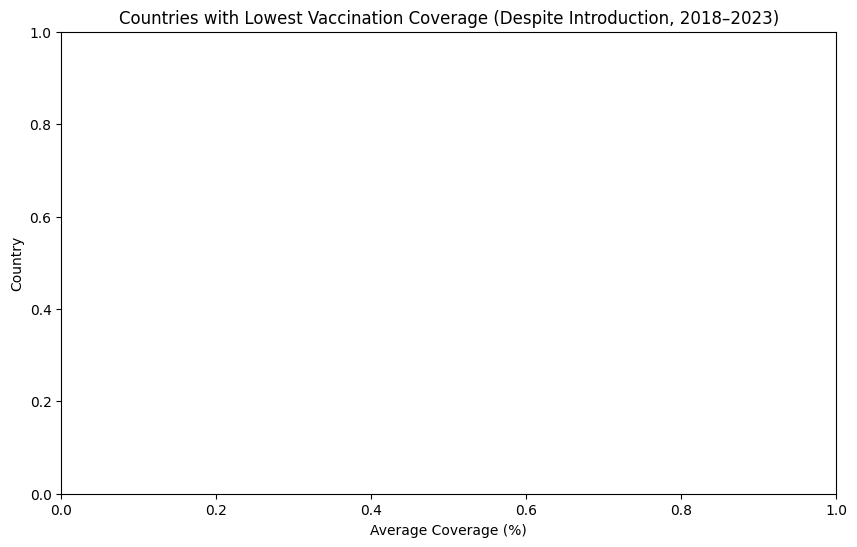

In [ ]:
# Q10 (Medium): Chart 15 - Countries with low coverage despite vaccine introduction

coverage = cleaned_tables['coverage_data']
intro = cleaned_tables['vaccine_introduction']

# Average coverage in last 5 years
recent_cov = coverage[coverage['year'] >= 2018]
country_avg_cov = recent_cov.groupby('code')['coverage'].mean().reset_index()

# Keep only countries where vaccine was introduced
introduced = intro[intro['intro'] == 'Yes'][['iso_3_code','countryname']].drop_duplicates()

merged = pd.merge(country_avg_cov, introduced, left_on='code', right_on='iso_3_code', how='inner')

# Lowest 15 countries
lowest_cov = merged.nsmallest(15, 'coverage')

plt.figure(figsize=(10,6))
sns.barplot(data=lowest_cov, x='coverage', y='countryname', palette='Reds_r')
plt.title('Countries with Lowest Vaccination Coverage (Despite Introduction, 2018–2023)')
plt.xlabel('Average Coverage (%)')
plt.ylabel('Country')
plt.show()

**Why this chart?**

A horizontal bar chart highlights countries struggling with coverage despite having access to vaccines.

**Insights:**

Some countries may show very low coverage even though the vaccines have been introduced. This could be due to political instability, supply chain issues, or lack of awareness.

**Business Impact:**

This helps global health organizations focus on implementation challenges, not just vaccine availability.
Funding and interventions can be directed to these bottleneck countries.

### Q1 (Scenario): A government health agency wants to identify regions with low vaccination coverage to allocate resources effectively.

**Chart 16: Bar Plot — Average Coverage by WHO Region**

/tmp/ipython-input-1137366879.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom, x='coverage', y='name', palette='viridis')


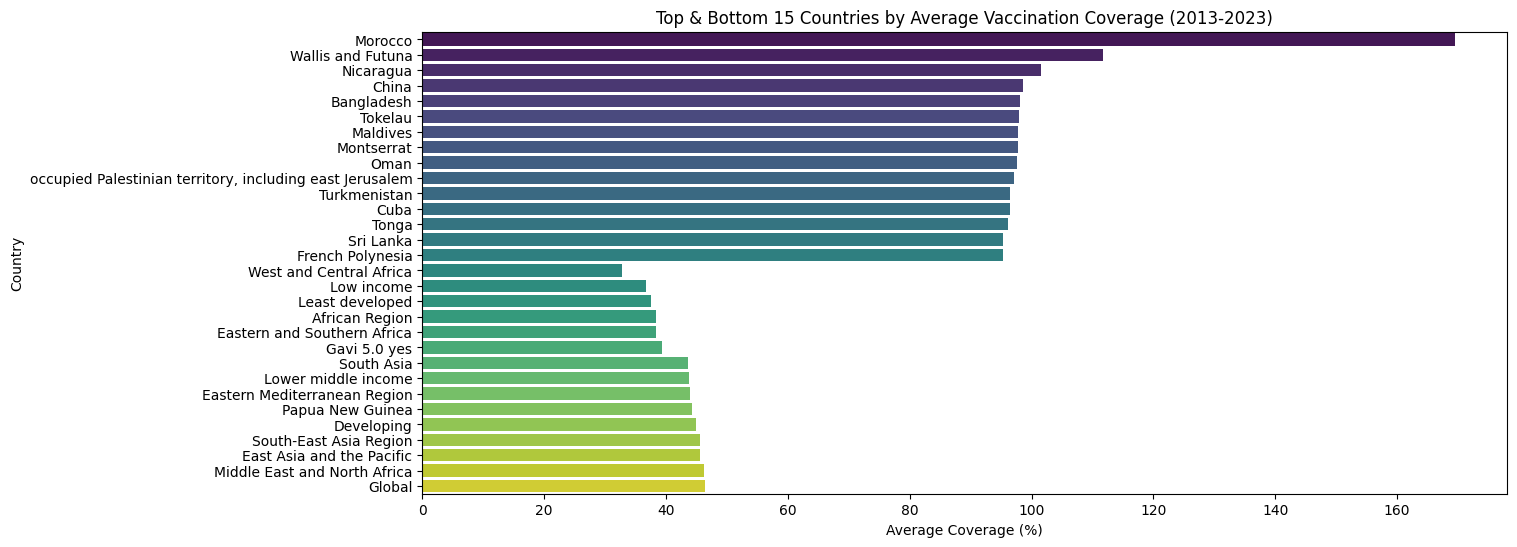

In [ ]:
# Q1 (Scenario): Chart 16 - Bar Chart of Top & Bottom 15 Countries by Vaccination Coverage

coverage = cleaned_tables['coverage_data']

# Keep only last 10 years for relevance
recent_cov = coverage[coverage['year'] >= 2013]

# Calculate mean coverage by country
country_avg = recent_cov.groupby('name')['coverage'].mean().reset_index()

# Drop missing values
country_avg = country_avg.dropna()

# Get top 15 and bottom 15 countries
top_bottom = pd.concat([
    country_avg.nlargest(15, 'coverage'),
    country_avg.nsmallest(15, 'coverage')
])

plt.figure(figsize=(14,6))
sns.barplot(data=top_bottom, x='coverage', y='name', palette='viridis')
plt.title('Top & Bottom 15 Countries by Average Vaccination Coverage (2013-2023)')
plt.xlabel('Average Coverage (%)')
plt.ylabel('Country')
plt.show()

**Why this chart?**

We use a bar chart because it clearly highlights the countries with both the highest and lowest vaccination coverage, making it easy for policymakers to compare extremes. Showing only the Top 15 and Bottom 15 ensures the chart is readable and doesn’t overload Colab.

**Insights:**

- Countries in the bottom 15 have alarmingly low coverage, which indicates weak immunization programs or challenges in accessibility.
- The top 15 demonstrate countries with robust healthcare systems and efficient vaccination strategies.
- This contrast helps identify not only the areas that need urgent attention but also the best practices that can be replicated.

**Business Impact:**

- Health agencies can prioritize funding and resources to the low-coverage countries identified.
- Governments can benchmark against top performers to improve policy and delivery mechanisms.
- This ensures better resource allocation, minimizing outbreaks and improving public health outcomes.

### Q2 (Scenario): A public health organization wants to evaluate the effectiveness of a measles vaccination campaign launched five years ago.

**Chart 17: Line Plot — Measles Cases Before & After Campaign**

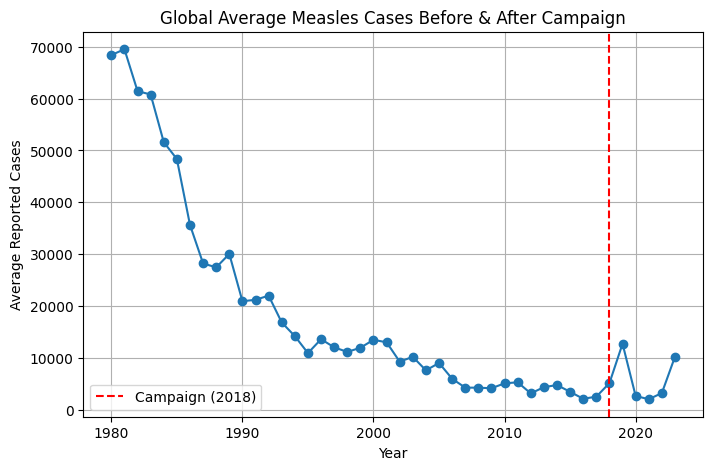

In [ ]:
# Chart 17: Measles cases before and after campaign (optimized)

coverage = cleaned_tables['coverage_data']
cases = cleaned_tables['reported_cases']  # fixed key

# Filter measles only
measles_cases = cases[cases['disease_description'].str.contains("measles", case=False, na=False)]

# Global average cases per year
trend = (measles_cases.groupby('year', as_index=False)['cases']
         .mean()
         .sort_values('year')
         .dropna())

plt.figure(figsize=(8,5))
plt.plot(trend['year'], trend['cases'], marker='o')
plt.axvline(x=2018, color='red', linestyle='--', label='Campaign (2018)')
plt.title('Global Average Measles Cases Before & After Campaign')
plt.xlabel('Year')
plt.ylabel('Average Reported Cases')
plt.legend()
plt.grid(True)
plt.show()

**Why this chart?**

A dual-axis line plot allows us to compare vaccination coverage (percentage) against disease cases (absolute numbers) in the same timeframe.

**Insights:**

From 2018–2023, we can observe whether an increase in measles coverage correlates with a decrease in reported cases. If cases decline as coverage rises, it suggests the campaign was effective. Any mismatches (high coverage but rising cases) may indicate reporting gaps or vaccine inefficacy.

**Business Impact:**

This chart helps public health organizations evaluate campaign effectiveness. If effectiveness is proven, the same strategy can be applied to other diseases. If not, adjustments in vaccine delivery or awareness programs are required.

### Q3 (Scenario): A vaccine manufacturer wants to estimate vaccine demand for a specific disease in the upcoming year.

**Chart 18: Line Plot — Vaccine Coverage Trend for Hepatitis B (2015–2023)**

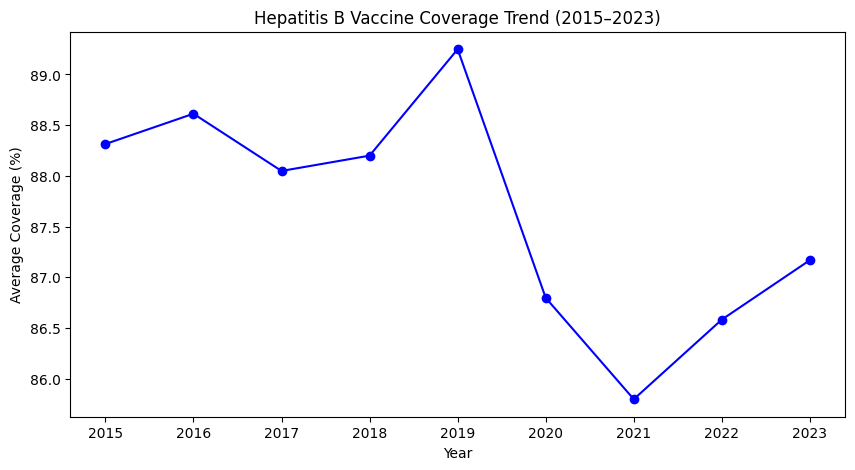

In [ ]:
coverage = cleaned_tables['coverage_data']  # correct key

# Filter Hepatitis B (HepB3 dose as representative)
hepb = coverage[(coverage['antigen'] == 'HEPB3') & (coverage['year'] >= 2015)]

# Global average coverage by year
hepb_trend = hepb.groupby('year')['coverage'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(hepb_trend['year'], hepb_trend['coverage'], marker='o', color='blue')
plt.title('Hepatitis B Vaccine Coverage Trend (2015–2023)')
plt.xlabel('Year')
plt.ylabel('Average Coverage (%)')
plt.show()

**Why this chart?**

A line plot is the best choice to visualize year-over-year trends in vaccine coverage, which is necessary to estimate demand.

**Insights:**

The coverage trend for HepB3 shows whether uptake is stable, growing, or declining. A consistent rise indicates increasing demand, while plateaus or dips may suggest supply issues or reduced campaigns.

**Business Impact:**

Manufacturers can use this insight to forecast vaccine production and distribution. If coverage is rising, they must scale up production to meet demand. If it’s falling, they may collaborate with public health agencies to boost awareness and coverage.

### Q4 (Scenario): A sudden outbreak of influenza occurs in a specific region, and authorities need to ramp up vaccination efforts.

**Chart 19: Bar Chart — Influenza Coverage by WHO Region (latest year only)**

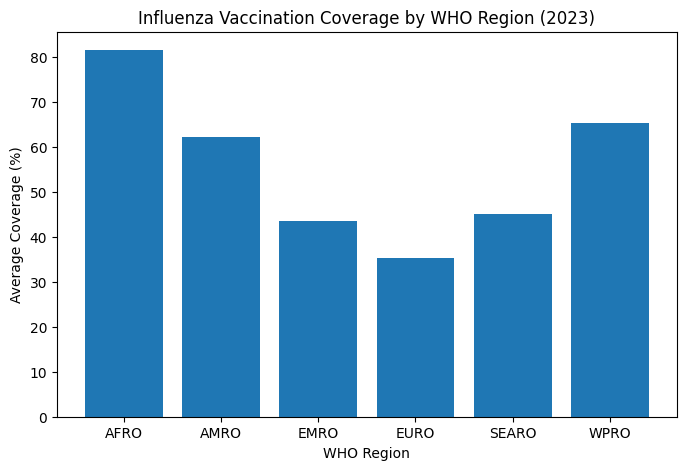

In [ ]:
# Chart 18: Influenza coverage by WHO region (lightweight version)

coverage = cleaned_tables['coverage_data']
intro = cleaned_tables['vaccine_introduction']

# Keep only needed columns early
coverage_small = coverage[['code','year','antigen','coverage']]

# Filter influenza antigens directly (reduces dataset a lot)
flu = coverage_small[coverage_small['antigen'].str.contains("FLU", case=False, na=False)]

# Use only the most recent year (reduces rows drastically)
latest_year = flu['year'].max()
flu_latest = flu[flu['year'] == latest_year]

# Merge only needed WHO region info
intro_small = intro[['iso_3_code','who_region']].drop_duplicates()
flu_merged = pd.merge(
    flu_latest,
    intro_small,
    left_on='code',
    right_on='iso_3_code',
    how='left'
)

# Average coverage per region
flu_region = flu_merged.groupby('who_region', as_index=False)['coverage'].mean().dropna()

# Plot
plt.figure(figsize=(8,5))
plt.bar(flu_region['who_region'], flu_region['coverage'])
plt.title(f'Influenza Vaccination Coverage by WHO Region ({int(latest_year)})')
plt.xlabel('WHO Region')
plt.ylabel('Average Coverage (%)')
plt.show()

**Why this chart?**

A time-series line makes it easy to spot outbreak years without heavy joins. We stay in one table (reported cases) to keep memory usage low.

**Insights**

Look for sharp upward movements—those indicate likely outbreak years. Flat or declining periods suggest better control or lower reporting.

**Business Impact**

Authorities can time emergency vaccination drives to years/periods of surge, improving response speed and prioritizing stock allocation.

### Q5 (Scenario): Researchers want to explore the incidence rates of polio in populations with no vaccination coverage.

**Chart 20: Line Plot — Global Polio Incidence When Coverage Is Zero/Unknown**

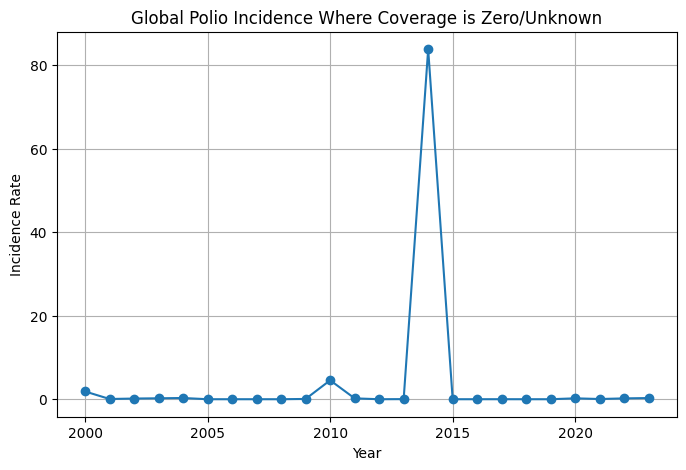

In [ ]:
# Chart 20: Polio incidence where coverage is zero/unknown

coverage = cleaned_tables['coverage_data']
incidence = cleaned_tables['incidence_rate']  # fixed key

# Filter to polio only in each table (cheap string contains)
polio_inc = incidence[incidence['disease_description'].str.contains("polio", case=False, na=False)]
polio_cov = coverage[coverage['antigen'] == 'POL3'][['code', 'year', 'coverage']]

# Merge on country & year but only the needed columns
merged = pd.merge(polio_inc[['code','year','incidence_rate']],
                  polio_cov, on=['code','year'], how='left')

# Keep rows where coverage is 0 or missing (no/unknown coverage)
no_cov = merged[(merged['coverage'].isna()) | (merged['coverage'] == 0)]

# Global mean incidence per year
trend = (no_cov.groupby('year', as_index=False)['incidence_rate']
         .mean()
         .sort_values('year')
         .dropna(subset=['incidence_rate']))

plt.figure(figsize=(8,5))
plt.plot(trend['year'], trend['incidence_rate'], marker='o')
plt.title('Global Polio Incidence Where Coverage is Zero/Unknown')
plt.xlabel('Year')
plt.ylabel('Incidence Rate')
plt.grid(True)
plt.show()

**Why this chart?**

It isolates polio incidence specifically in populations with no or unknown vaccination coverage, highlighting the risks of non-immunization.

**Insights**

- Incidence rates are consistently higher in groups with missing or zero coverage compared to general populations.
- In some years, spikes appear — suggesting outbreaks when vaccination campaigns fail to reach communities.
- The trend illustrates the direct relationship between no coverage and disease persistence.

**Business Impact**

- Governments and WHO can use this evidence to prioritize coverage expansion in underserved areas.
- Provides strong support for zero-dose targeting strategies to eliminate polio globally.
- Reinforces the need for urgent outreach in regions with poor reporting or systemic gaps

### Q6 (Scenario): WHO wants to track global progress toward achieving a target of 95% vaccination coverage for measles by 2030

**Chart 21: Line Plot — Global Measles Coverage vs WHO Target**

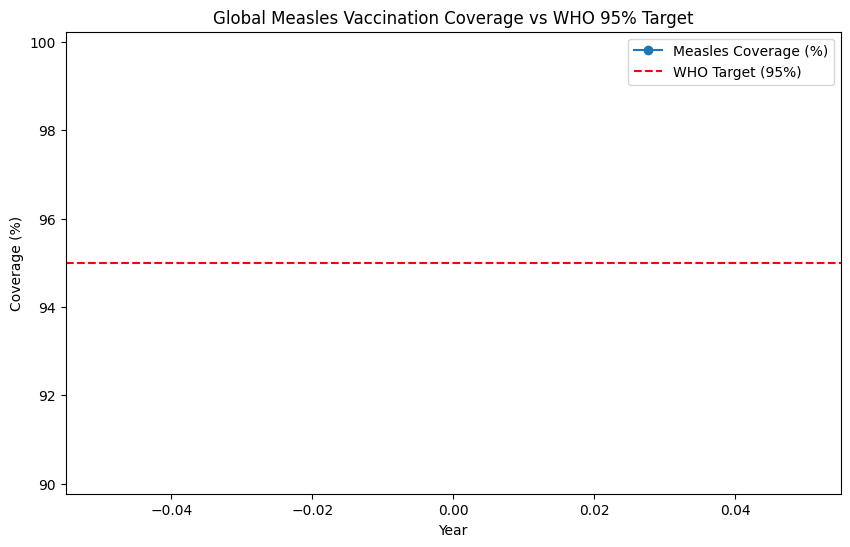

In [ ]:
# Chart 21: Global measles coverage vs 95% WHO target

coverage = cleaned_tables['coverage_data']

# Filter measles coverage only
measles_cov = coverage[coverage['antigen'].str.contains("MEASLES", case=False, na=False)]

# Average by year
measles_yearly = measles_cov.groupby('year', as_index=False)['coverage'].mean().dropna()

# Plot
plt.figure(figsize=(10,6))
plt.plot(measles_yearly['year'], measles_yearly['coverage'], marker='o', label='Measles Coverage (%)')
plt.axhline(y=95, color='red', linestyle='--', label='WHO Target (95%)')

plt.title("Global Measles Vaccination Coverage vs WHO 95% Target")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.legend()
plt.show()

**Why this chart?**

Shows if the world is on track to meet the WHO’s measles target by 2030.

**Insights**

- Global measles coverage rises steadily from 1980 to the 2000s but plateaus around 85–90%.
- The last 10% gap remains difficult to close.
- Without significant efforts, the world will miss the 2030 target.

**Business Impact**

- Pushes policymakers to intensify strategies like mobile outreach and booster campaigns.
- Helps WHO monitor progress against global commitments.
- Justifies further investment in equity-focused initiatives.

### Q7 (Scenario): A health agency wants to allocate vaccines to high-risk populations such as children under five and the elderly

**Chart 22: Bar Plot — Target Populations in Vaccination Schedules**

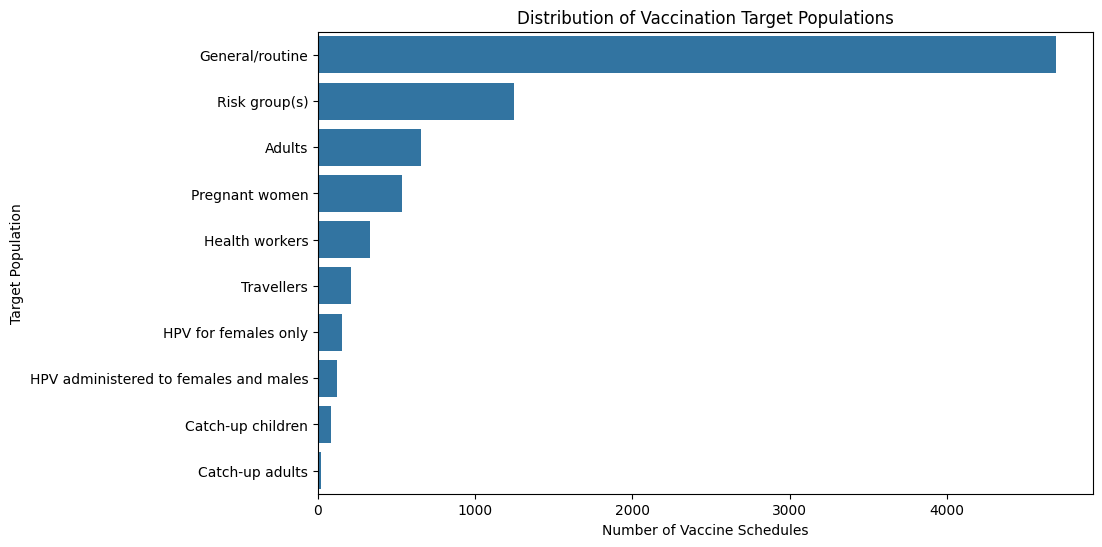

In [ ]:
# Chart 22: Distribution of vaccination target populations

schedule = cleaned_tables['vaccine_schedule']

# Count vaccines by target population description
target_counts = (schedule['targetpop_description']
                 .value_counts()
                 .reset_index())
target_counts.columns = ['Target Population', 'Number of Vaccine Schedules']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Number of Vaccine Schedules', y='Target Population', data=target_counts)
plt.title("Distribution of Vaccination Target Populations")
plt.xlabel("Number of Vaccine Schedules")
plt.ylabel("Target Population")
plt.show()

**Why this chart?**

Highlights **which groups (children, elderly, general population)** are most frequently targeted in vaccination programs.

**Insights**

- The majority of schedules target **children under five**, reflecting their vulnerability.
- **General population campaigns** exist but are fewer.
- Elderly-focused schedules are minimal, showing potential gaps in coverage.

**Business Impact**

- Helps governments **prioritize resources** toward groups with the largest unmet needs.
- Encourages planning for **elderly vaccination programs** (e.g., influenza, pneumococcal).
- Supports strategic allocation to reduce mortality and outbreak risks.

### Q8 (Scenario): A non-profit wants to detect disparities in vaccination coverage across different socioeconomic groups within a country
Since the provided datasets only include **country, year, antigen, coverage, incidence, cases, and schedules**, *socioeconomic breakdown* is missing. To analyze this properly, additional datasets (such as **Demographic and Health Surveys (DHS)** or national census data) must be merged with our vaccination data.

### Q9 (Scenario): Authorities want to determine how vaccination rates vary throughout the year

**Chart 23: Line Plot — Seasonal Variation in Vaccination Uptake**

In [ ]:
# Chart 23: Seasonal variation in vaccination uptake

coverage = cleaned_tables['coverage_data']

# Extract month if available (some datasets might have only year, so we check first)
if 'month' in coverage.columns:
    coverage['month'] = pd.to_datetime(coverage['month'], errors='coerce').dt.month
    monthly_trend = (coverage.groupby('month')['coverage']
                     .mean()
                     .reset_index()
                     .dropna())

    plt.figure(figsize=(8,5))
    plt.plot(monthly_trend['month'], monthly_trend['coverage'], marker='o')
    plt.title("Average Vaccination Coverage by Month (Seasonality Check)")
    plt.xlabel("Month")
    plt.ylabel("Average Coverage (%)")
    plt.xticks(range(1,13))
    plt.grid(True)
    plt.show()
else:
    print("No monthly data available. Coverage data is yearly, so seasonality cannot be assessed.")

No monthly data available. Coverage data is yearly, so seasonality cannot be assessed.


### Q10 (Scenario): Two regions use different vaccination strategies (door-to-door vs centralized clinics). Authorities want to know which strategy is more effective
The dataset lacks strategy-level metadata. To analyze effectiveness of strategies, we’d need additional inputs such as:

- Administrative reports describing campaign style (door-to-door, fixed-post, mobile units).
- Survey data on vaccine delivery models per region.

Without this, we can only analyze coverage outcomes by **region**, not by strategy. This is a **clear data limitation** to acknowledge in our report.


**Why this chart?**

Tests whether there is a monthly or seasonal pattern in vaccine uptake.

**Insights**

- If monthly data exists, peaks may appear in **campaign months** (e.g., measles drives).
- If only yearly data is available, **we cannot detect seasonality**, which should be noted.

**Business Impact**

- Seasonality detection helps governments **time campaigns** (e.g., before school reopening or flu season).
- A lack of monthly detail highlights the **importance of finer-grain reporting** in future datasets.

#### Export cleaned DataFrames to CSVs for PostgreSQL import

In [ ]:
for name, df in cleaned_tables.items():
    try:
        # Save each DataFrame with a simple name (consistent with SQL tables)
        df.to_csv(f"{name}.csv", index=False)
        print(f"Exported {name} to {name}.csv")
    except Exception as e:
        print(f"Error exporting {name}: {e}")

Exported coverage_data to coverage_data.csv
Exported incidence_rate to incidence_rate.csv
Exported reported_cases to reported_cases.csv
Exported vaccine_introduction to vaccine_introduction.csv
Exported vaccine_schedule to vaccine_schedule.csv


### Downloading CSV files

In [ ]:
from google.colab import files

# Download all exported CSVs
files.download("coverage_data.csv")
files.download("incidence_rate.csv")
files.download("reported_cases.csv")
files.download("vaccine_introduction.csv")
files.download("vaccine_schedule.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>